In [4]:
from fastai.vision.all import *
from fastbook import *
import pandas as pd
from math import exp
import numpy as np
matplotlib.rc('image', cmap='Greys')

In [5]:
! kaggle competitions download -c digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
data = pd.read_csv('train.csv')


In [7]:
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  \
0       0       0        0        0        0        0        0        0   
1       0       0        0        0        0        0        0        0   
2       0       0        0        0        0        0        0        0   
3       0       0        0        0        0        0        0        0   
4       0       0        0        0        0        0        0        0   

   pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        

In [8]:
data = np.array(data)

m,n = data.shape
np.random.shuffle(data)

In [9]:
m,n = data.shape
np.random.shuffle(data)

In [10]:
data_dev = data[0:1000].T
X_dev = data_dev[1:n]
y_dev = data_dev[0]
X_dev = X_dev / 255.

In [11]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train /255.
_, m_train = X_train.shape 


In [12]:
def init_params():
    W1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1 , b1 , W2 , b2 

In [20]:
def ReLu(Z):
   return np.maximum(0, Z)
    
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    
def forward_prop(W1, b1 , W2, b2, X):
    Z1 = W1.dot(X)  + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2 
    A2 = softmax(Z2)
    
    return Z1 , Z2  , A1 , A2
    

In [21]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size) , Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0
    
def back_prop(Z1 , Z2 , A1 , A2, W2 ,X, Y ):
    m= Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) *deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW2 ,dW1, db1, db2

In [22]:
def update_params(W1, b1, W2, b2, dW2, dW1, db1, db2, alpha):
  
    W1 = W1 - alpha * dW2
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW1
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [23]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y , iter, alpha):
    W1, b1 , W2 , b2 = init_params()
    for i in range(iter):
        Z1 , Z2  , A1 , A2= forward_prop(W1, b1 , W2 , b2, X)
        dW1 , dW2, db1 , db2 =back_prop(Z1 , Z2  , A1 , A2, W2, X , Y)
        W1, b1 , W2, b2 = update_params(W1, b1, W2 , b2 ,dW2 ,dW1, db1, db2, alpha)
        
        if i % 10 == 0 :
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1 , b1 , W2 , b2 
    

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.10)

Iteration:  0
[4 4 4 ... 4 7 2] [2 6 4 ... 2 6 0]
0.10421951219512195
Iteration:  10
[4 4 4 ... 6 4 4] [2 6 4 ... 2 6 0]
0.1402439024390244
Iteration:  20
[2 4 4 ... 6 4 4] [2 6 4 ... 2 6 0]
0.18260975609756097
Iteration:  30
[2 4 4 ... 6 4 2] [2 6 4 ... 2 6 0]
0.22639024390243903
Iteration:  40
[2 4 4 ... 6 4 2] [2 6 4 ... 2 6 0]
0.27358536585365856
Iteration:  50
[2 4 4 ... 6 4 0] [2 6 4 ... 2 6 0]
0.3517073170731707
Iteration:  60
[2 4 4 ... 6 4 0] [2 6 4 ... 2 6 0]
0.40836585365853656
Iteration:  70
[2 4 4 ... 6 4 0] [2 6 4 ... 2 6 0]
0.4554878048780488
Iteration:  80
[2 4 4 ... 6 4 0] [2 6 4 ... 2 6 0]
0.49997560975609756
Iteration:  90
[2 4 4 ... 6 4 0] [2 6 4 ... 2 6 0]
0.5408780487804878
Iteration:  100
[2 4 4 ... 6 6 0] [2 6 4 ... 2 6 0]
0.5816341463414634
Iteration:  110
[2 4 4 ... 6 6 0] [2 6 4 ... 2 6 0]
0.6165121951219512
Iteration:  120
[2 4 4 ... 6 6 0] [2 6 4 ... 2 6 0]
0.6435853658536586
Iteration:  130
[2 4 4 ... 6 6 0] [2 6 4 ... 2 6 0]
0.6667073170731708
Iteration: 

In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


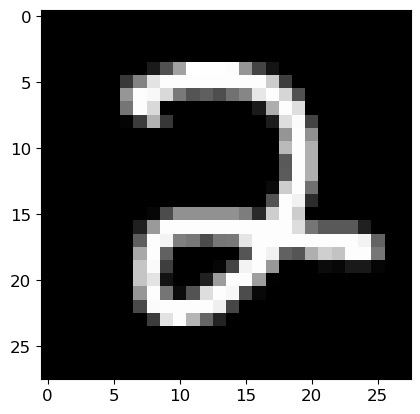

Prediction:  [6]
Label:  6


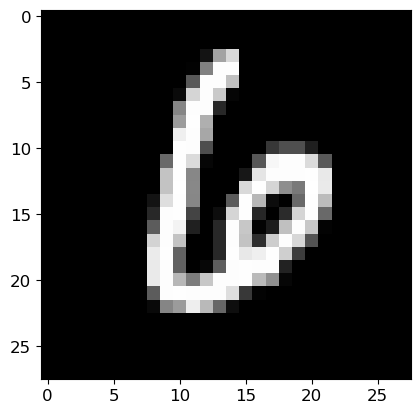

Prediction:  [4]
Label:  4


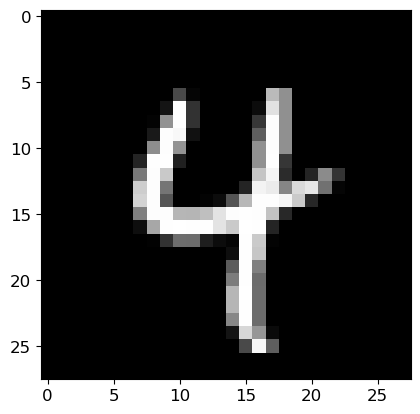

Prediction:  [3]
Label:  8


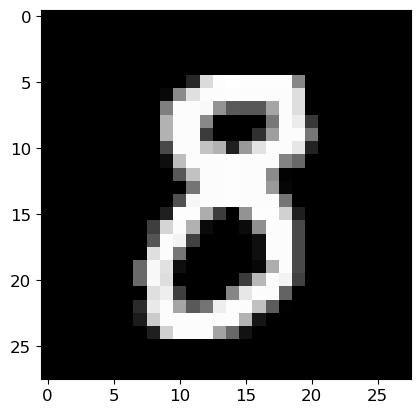

In [26]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [31]:
import numpy as np
from PIL import Image

def preprocess_image(image_path, target_size=(28, 28)):
    try:
        # Load the image
        img = Image.open(image_path)
        
        # Convert to RGB if the image has an alpha channel (PNG)
        if img.mode == 'RGBA':
            img = img.convert('RGB')
        
        # Convert to grayscale
        img = img.convert('L')
        
        # Resize the image
        img = img.resize(target_size)
        
        # Convert to numpy array and normalize
        img_array = np.array(img).reshape(1, 28*28) / 255.0
        
        return img_array.T  # Transpose to match the shape (784, 1)
    
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None
    return img_array.T  # Transpose to match the shape (784, 1)

In [32]:
def predict_custom_image(image_path, W1, b1, W2, b2):
    # Preprocess the image
    X = preprocess_image(image_path)
    
    # Forward propagation
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    
    # Get the prediction
    prediction = get_predictions(A2)
    
    return prediction[0]  # Return the single prediction

In [35]:
# Assuming you have already trained your model and have W1, b1, W2, b2

# Path to your custom image
custom_image_path = "images.png"

# Make prediction
predicted_digit = predict_custom_image(custom_image_path, W1, b1, W2, b2)

print(f"The predicted digit is: {predicted_digit}")

The predicted digit is: 6


In [36]:
import pickle

model_params = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2
}

with open('model.pkl', 'wb') as f:
    pickle.dump(model_params, f)